<a href="https://colab.research.google.com/github/jvellozo21/AER_850_Project-3/blob/main/Project_3_AER_850_JV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#AER 850 Project 3
#501106139 Jayden Vellozo


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


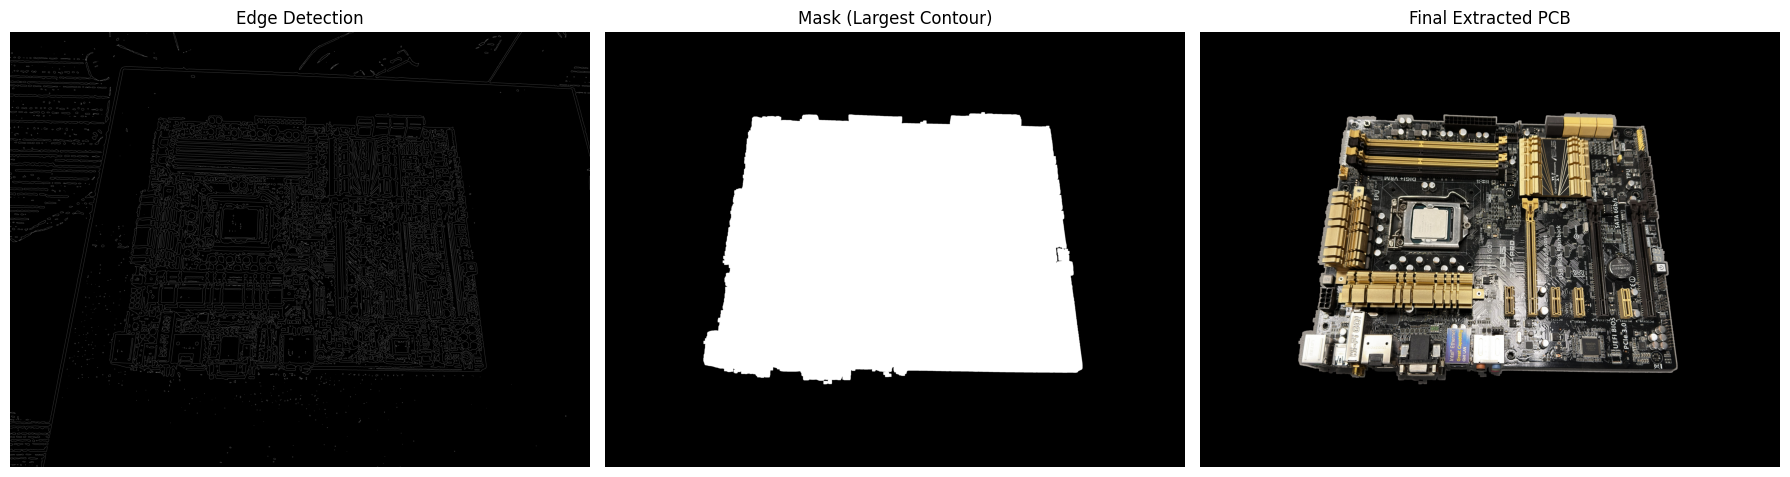

In [ ]:
# STEP 1: Object Masking with Contour Extraction

import cv2
import numpy as np
from matplotlib import pyplot as plt

#Path to your motherboard image
image_path = "/content/drive/MyDrive/Colab Notebooks/Project 3/Project 3 Data/motherboard_image.JPEG"

#1) Load original image
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

#2) Rotate to correct orientation
rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)

#3) Gaussian blur to remove noise
blurred_image = cv2.GaussianBlur(rotated_image, (47, 47), 4)

#4) Convert to grayscale
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

#5) Adaptive threshold (better for uneven lighting)
threshold_image = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, 7)

#6) Edge detection
edges_detected = cv2.Canny(threshold_image, 50, 350)

#7) Dilate to strengthen edges
dilated_edges = cv2.dilate(edges_detected, None, iterations=12)

#8) Find contours
detected_contours, _ = cv2.findContours(
    dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#9) Mask with largest contour
contour_mask = np.zeros_like(rotated_image)
largest_contour = max(detected_contours, key=cv2.contourArea)

cv2.drawContours(
    image=contour_mask,
    contours=[largest_contour],
    contourIdx=-1,
    color=(255, 255, 255),
    thickness=cv2.FILLED
)

#10) Apply mask
final_masked_image = cv2.bitwise_and(rotated_image, contour_mask)

# Convert for plotting
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
mask_rgb = cv2.cvtColor(mask_canvas, cv2.COLOR_BGR2RGB)
final_masked_rgb = cv2.cvtColor(pcb_isolated, cv2.COLOR_BGR2RGB)

# Plot results
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.imshow(edges_rgb)
plt.title('Edge Detection')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask_rgb)
plt.title('Mask (Largest Contour)')
plt.axis('off')

plt.subplot(133)
plt.imshow(final_masked_rgb)
plt.title('Final Extracted PCB')
plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
# STEP 2: YOLOv11 Training

!pip install ultralytics -q
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Correct path to dataset YAML
data_yaml = "/content/drive/MyDrive/Colab Notebooks/Project 3/Project 3 Data/data/data.yaml"

#Load YOLO v11 nano (required by project)
model = YOLO("yolo11n.pt")

#Train the model
results = model.train(
    data=data_yaml,
    epochs=175,
    imgsz=1200,
    batch=3,
    name="yolo11_pcb_project"  # No spaces (important)
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=3, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/Project 3/Project 3 Data/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=175, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format

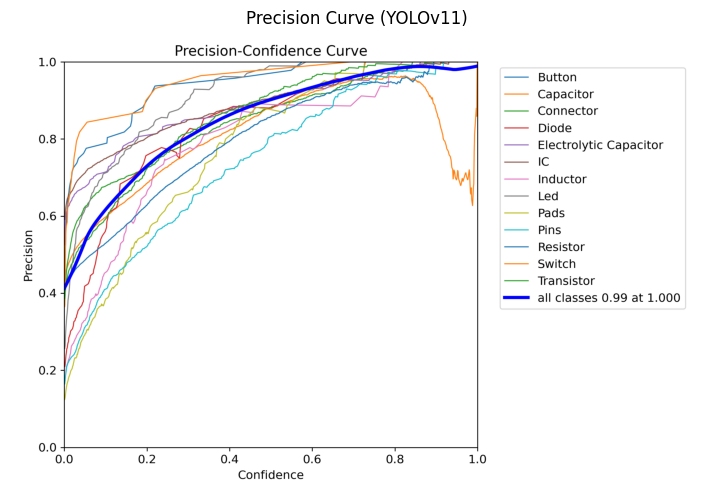

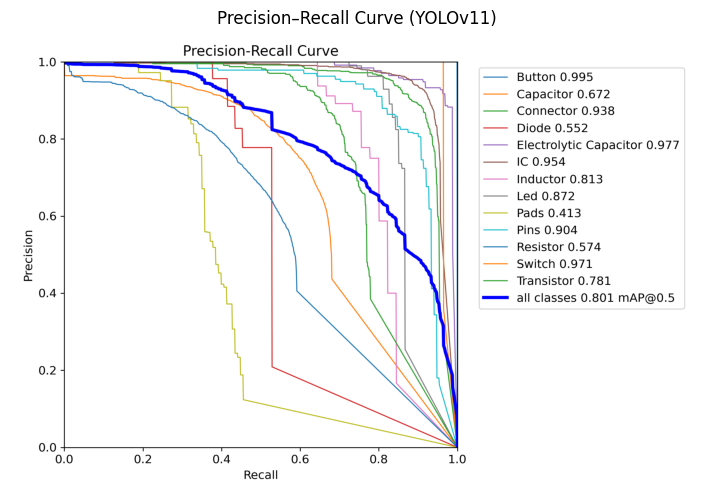

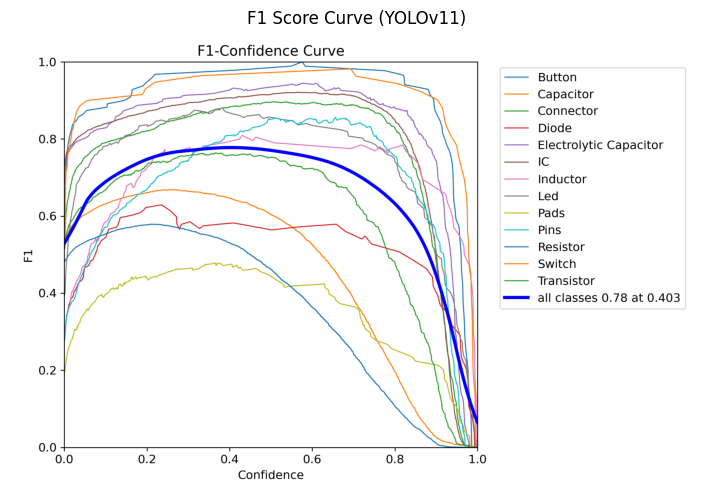

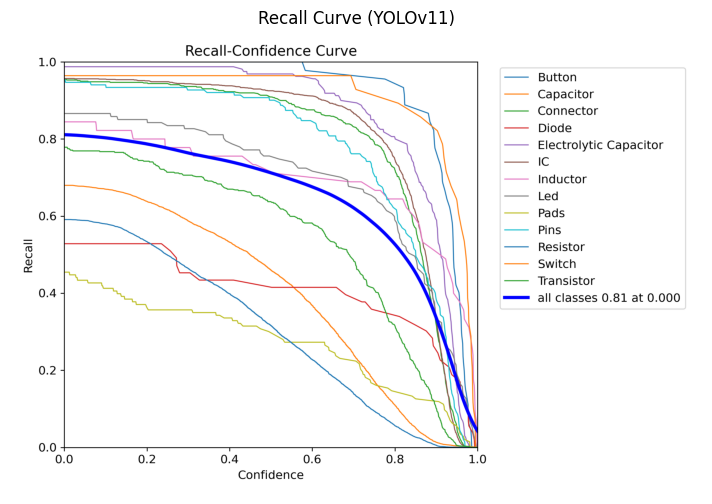

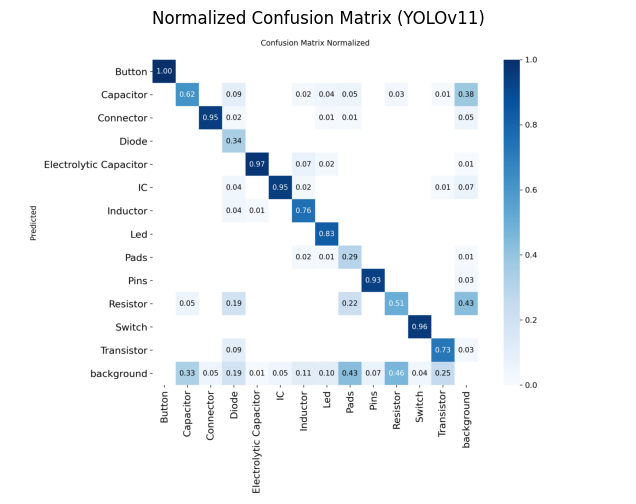

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base = "/content/runs/detect/yolo11_pcb_project"

# Correct YOLOv11 file names
pc_path = f"{base}/BoxP_curve.png"
pr_path = f"{base}/BoxPR_curve.png"
cm_path = f"{base}/confusion_matrix_normalized.png"
f1_path = f"{base}/BoxF1_curve.png"
recall_path = f"{base}/BoxR_curve.png"

# Plot Precision Curve
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread(pc_path))
plt.title("Precision Curve (YOLOv11)")
plt.axis('off')
plt.show()

# Plot Precision–Recall Curve
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread(pr_path))
plt.title("Precision–Recall Curve (YOLOv11)")
plt.axis('off')
plt.show()

# Plot F1 Curve
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread(f1_path))
plt.title("F1 Score Curve (YOLOv11)")
plt.axis('off')
plt.show()

# Plot Recall Curve
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread(recall_path))
plt.title("Recall Curve (YOLOv11)")
plt.axis('off')
plt.show()

# Plot Confusion Matrix (Normalized)
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread(cm_path))
plt.title("Normalized Confusion Matrix (YOLOv11)")
plt.axis('off')
plt.show()


In [ ]:
# STEP 3: Evaluation on the 3 PCB Boards

from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from ultralytics.utils.plotting import Annotator
import cv2
import numpy as np

trained_model = YOLO("/content/runs/detect/yolo11_pcb_project/weights/best.pt")

eval_images = [
    "/content/drive/MyDrive/Colab Notebooks/Project 3/Project 3 Data/data/evaluation/ardmega.jpg",
    "/content/drive/MyDrive/Colab Notebooks/Project 3/Project 3 Data/data/evaluation/arduno.jpg",
    "/content/drive/MyDrive/Colab Notebooks/Project 3/Project 3 Data/data/evaluation/rasppi.jpg"
]

#stable random color for each class
num_classes = len(trained_model.names)
colors = {cls_id: tuple(np.random.randint(50, 255, 3).tolist()) for cls_id in range(num_classes)}

#Loop
for img_path in eval_images:
    image_name = img_path.split('/')[-1]
    print(f"\n=== Evaluating: {image_name} ===")

    results = trained_model(img_path, imgsz=1216, conf=0.30)[0]
    print("Detected classes:", results.boxes.cls.cpu().numpy())

    # Load image with cv2
    img = cv2.imread(img_path)
    h, w, _ = img.shape

    # Auto font size based on image width
    font_size = w * 0.00035    # scale width → font size
    line_width = max(1, int(w * 0.002))  # thin but visible boxes

    annotator = Annotator(
        img,
        line_width=line_width,
        font_size=font_size
    )

    for box in results.boxes:
        xyxy = box.xyxy[0].tolist()
        cls = int(box.cls)
        conf = float(box.conf)
        label = f"{results.names[cls]} {conf:.2f}"
        color = colors[cls]

        annotator.box_label(xyxy, label, color=color)

    cv2_imshow(annotator.result())
